In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

local_zip = '/content/drive/My Drive/test/assignment2.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

#!ls
#!ls /content/drive/'My Drive'/test
#!ls /content/drive/'My Drive'/test/'assignment2.zip (Unzipped Files)'/test
!ls /tmp/test
#!ls /tmp/test/Airbus



Airbus	Canadair  Eurofighter	   McDonnell_Douglas  Saab
Boeing	Embraer   Lockheed_Martin  Robin	      Yakovlev




제조사별 train 이미지들이 있는 디렉토리의 경로를 d0,d1,...d9에 담는다.
제조사별 test 이미지들이 있는 디렉토리의 경로를 D0,D1,...D9에 담는다.
d0,d1,...d9를 train_dirs에 담는다.
D0,D1,...,D9를 test_dirs에 담는다.


In [ ]:
#base_dir = '/tmp/dataset'
base_dir='/tmp'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

!ls /tmp
#!ls /tmp/train/Airbus

d0=os.path.join(train_dir,'Airbus')           #train_Airbus_dir
d1=os.path.join(train_dir,'Boeing')           #train_Boeing_dir
d2=os.path.join(train_dir,'Canadair')         #train_Canadair_dir
d3=os.path.join(train_dir,'Embraer')          #train_Embraer_dir=
d4=os.path.join(train_dir,'Eurofighter')      #train_Eurofighter_dir=
d5=os.path.join(train_dir,'McDonnell_Douglas')#train_McDonnell_Douglas_dir=
d6=os.path.join(train_dir,'Lockheed_Martin')  #train_Lockheed_Martin_dir=
d7=os.path.join(train_dir,'Robin')            #train_Robin_dir=
d8=os.path.join(train_dir,'Saab')             #train_Saab_dir=
d9=os.path.join(train_dir,'Yakovlev')         #train_Yakovlev_dir=


D0=os.path.join(test_dir,'Airbus')           #train_Airbus_dir
D1=os.path.join(test_dir,'Boeing')           #train_Boeing_dir
D2=os.path.join(test_dir,'Canadair')         #train_Canadair_dir
D3=os.path.join(test_dir,'Embraer')          #train_Embraer_dir=
D4=os.path.join(test_dir,'Eurofighter')      #train_Eurofighter_dir=
D5=os.path.join(test_dir,'McDonnell_Douglas')#train_McDonnell_Douglas_dir=
D6=os.path.join(test_dir,'Lockheed_Martin')  #train_Lockheed_Martin_dir=
D7=os.path.join(test_dir,'Robin')            #train_Robin_dir=
D8=os.path.join(test_dir,'Saab')             #train_Saab_dir=
D9=os.path.join(test_dir,'Yakovlev')         #train_Yakovlev_dir=


train_dirs=[d0,d1,d2,d3,d4,d5,d6,d7,d8,d9]
test_dirs=[D0,D1,D2,D3,D4,D5,D6,D7,D8,D9]

#print(len(train_dirs))
#print(train_dirs[0])

# !pwd


drivefs_ipc.0  drivefs_ipc.0_shell  README  test  tmpa23kavyo  train


제조사별 비행기 이미지들이 있는 각 디렉토리의 파일명들을 모두 temp에 담고 temp를 train_fnames 리스트,test_fnames 리스트에 담는다.


In [ ]:

train_fnames=[]
test_fnames=[]

for i in train_dirs:
  temp=os.listdir(i)
  train_fnames.append(temp)

for i in test_dirs:
  temp=os.listdir(i)
  test_fnames.append(temp)


#print(train_fnames[0][1])

In [ ]:
#classNames=['Airbus', 'Boeing', 'Canadair', 'Embraer', 'Eurofighter', 'Lockhed_Martin', 'McDonel_Douglas', 'Robin', 'Sab', 'Yakovlev']


train 이미지들과 test 이미지들의 실제 이미지의 경로를 얻은 다음 tensorflow.keras.preprocessing.image.load_img 모듈을 활용하여 실제 이미지 배열(=리스트=행렬)을 얻고 256.0으로 나눠서 normalize한다. 
그리고 train_images와 test_images 배열에 담는다.
test_labels,train_labels도 저장한다.
(label은 ['Airbus', 'Boeing', 'Canadair', 'Embraer', 'Eurofighter', 'Lockhed_Martin', 'McDonel_Douglas', 'Robin', 'Sab', 'Yakovlev'순으로 0~9까지 배정함.)

In [ ]:

from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

print(tf.__version__)
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing.image import img_to_array, load_img

train_images=[]
train_labels=[]
test_images=[]
test_labels=[]
flag=0

for i in range(10):
  subdir=train_dirs[i]
  for fname in train_fnames[i]:
    img_path=os.path.join(subdir,fname)
    
    img = load_img(img_path, target_size=(200,200))
    x = img_to_array(img)
   
    x/=256.0
    
    #img=np.array(img)
    train_images.append(x)
    train_labels.append(i) 

for i in range(10):
  subdir=test_dirs[i]
  for fname in test_fnames[i]:
    img_path=os.path.join(subdir,fname)
   
    img = load_img(img_path, target_size=(200,200))
    x = img_to_array(img)
    x/=256.0
    
    #img=np.array(img)
    test_images.append(x)
    test_labels.append(i) 

train_images=np.array(train_images)
train_labels=np.array(train_labels)
test_images=np.array(test_images)
test_labels=np.array(test_labels)


train_images.shape


2.2.0


(3934, 200, 200, 3)

비행기 이미지들이 제대로 저장되었는지 확인하기 위해 비행기 이미지들을 출력해 보았음.

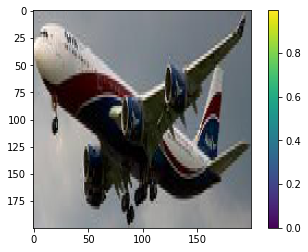

In [ ]:
plt.figure()
plt.imshow(train_images[0])
#plt.imshow(test_images[0])
plt.colorbar()
plt.show()

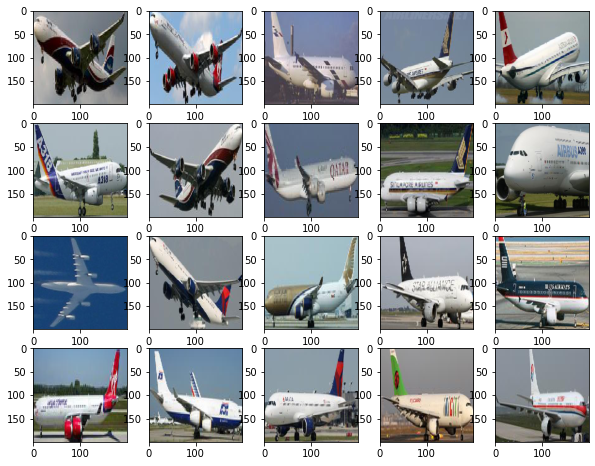

In [ ]:
plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(5,5,i+1)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
plt.show()

In [ ]:
from tensorflow import keras

여러가지 CNN 모델을 만들어 보았음. 최종적으로 5번째 모델을 사용하여 81퍼센트의 테스트 정확도와 0.62의 테스트 loss 값을 갖고 90퍼센트의 train 정확도를 갖는 모델을 얻었다. overfitting을 줄이기 위해 dropout을 사용해 보았고, parameter수가 너무 많아지지 않도록 신경망을 구성하였다.
CNN을 거친 뒤에 Flatten하여 Dense 신경망에 넣고 최종적으로 softmax를 통해 0~9 레이블 중 어떤 확률이 가장 높은지 얻는 방식으로 구현하였다.

In [ ]:
####### MODEL -1 accuracy: 0.41 ,loss:1.48#######  

# model=keras.Sequential([
#   keras.layers.Flatten(input_shape=(200,200,3)),
#   keras.layers.Dense(128,activation='relu'),
#   keras.layers.Dropout(0.5),
#   keras.layers.Dense(128,activation='relu'),
#   keras.layers.Dropout(0.5),
#   keras.layers.Dense(10,activation='softmax')
# ])



####### MODEL -2 test accuracy:0.65 (150x300)####### 

# from tensorflow.keras import layers
# # from tensorflow.keras import Model
# from tensorflow.keras import models

# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,3)))
# #model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,300,3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# model.add(layers.Flatten())
# model.add(layers.Dense(64,activation='relu'))
# model.add(layers.Dense(10, activation='softmax'))



####### MODEL -3 test accuracy:0.71  drop out,CNN층 추가 ####### 

# from tensorflow.keras import layers
# # from tensorflow.keras import Model
# from tensorflow.keras import models

# model = models.Sequential()

# model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(200,200,3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(32, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(16, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(32, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(16, (3, 3), activation='relu'))


# model.add(layers.Flatten())
# model.add(layers.Dense(256,activation='relu'))
# model.add(layers.Dropout(0.5))
# #keras.layers.Dropout(0.5),
# model.add(layers.Dense(256,activation='relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(64,activation='relu'))
# model.add(layers.Dense(10, activation='softmax'))

####### MODEL -4 test accuracy:0.74 drop out,CNN층 더 많이 추가..DENSE층도 더많이 추가 ####### 

# from tensorflow.keras import layers
# # from tensorflow.keras import Model
# from tensorflow.keras import models

# model = models.Sequential()

# model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(200,200,3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(32, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(32, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# # model.add(layers.MaxPooling2D((2, 2)))
# # model.add(layers.Conv2D(32, (3, 3), activation='relu'))


# model.add(layers.Flatten())
# model.add(layers.Dense(512,activation='relu'))
# model.add(layers.Dropout(0.5))
# #keras.layers.Dropout(0.5),
# model.add(layers.Dense(128,activation='relu'))
# model.add(layers.Dropout(0.5))

# model.add(layers.Dense(10, activation='softmax'))



####### MODEL -5 test accuracy:0.74 drop out,CNN층 더 많이 추가..DENSE층도 더많이 추가 + 레귤레이션 ####### 

#from tensorflow.keras import layers
#from tensorflow.keras import models

# model = models.Sequential()

# model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(200,200,3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Dropout(0.5))
# model.add(layers.Conv2D(32, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Dropout(0.5))
# model.add(layers.Conv2D(32, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# # model.add(layers.MaxPooling2D((2, 2)))
# # model.add(layers.Conv2D(32, (3, 3), activation='relu'))

# model.add(layers.Flatten())
# model.add(layers.Dense(512,kernel_regularizer=keras.regularizers.l2(0.001),activation='relu'))
# model.add(layers.Dropout(0.5))
# #keras.layers.Dropout(0.5),
# model.add(layers.Dense(128,kernel_regularizer=keras.regularizers.l2(0.001),activation='relu'))
# #model.add(layers.Dense(64,kernel_regularizer=keras.regularizers.l2(0.001),activation='relu'))
# model.add(layers.Dropout(0.5))

# model.add(layers.Dense(10, activation='softmax'))


####### MODEL -5 test accuracy:0.81  loss= 0.62 오버피팅 방지 위해 parameter 줄여서 학습 ####### 

from tensorflow.keras import layers
# from tensorflow.keras import Model
from tensorflow.keras import models

model = models.Sequential()

model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(200,200,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(200,200,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(200,200,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(64,kernel_regularizer=keras.regularizers.l2(0.001),activation='relu'))
#model.add(layers.Dropout(0.5))

#model.add(layers.Dense(128,kernel_regularizer=keras.regularizers.l2(0.001),activation='relu'))
#model.add(layers.Dropout(0.5))
# #model.add(layers.Dense(64,kernel_regularizer=keras.regularizers.l2(0.001),activation='relu'))


model.add(layers.Dense(10, activation='softmax'))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0

만든 신경망 모델을 컴파일.
optimizer는 adam을 사용, loss function은 cross entropy를 사용하였음.


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
max_acc=0   #테스트 정확도의 최댓값을 저장할 변수
arg_max=0   #테스트 정확도가 최대일 때의 epoch 값을 저장할 변수

model에 train image와 그에 대한 분류값인 train label을 넘겨주고 fit() 메소드를 호출하면 training이 시작된다. 





In [ ]:

#e: epoch
#test_loss : test loss
#test_acc : test accuracy
#max_acc : test accuracy의 최대값
#arg_max : test accuracy가 최대일 때 epoch값

for e in range(200):
  model.fit(train_images,train_labels,epochs=1)
  test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
  if max_acc<test_acc:
    arg_max=e
    max_acc=test_acc

  print('\n epoch =',e, '테스트 정확도:', test_acc)

print("최대 정확도: ",max_acc,"그 때의 epoch= ",arg_max)

123/123 [==============================] - 2s 19ms/step - loss: 1.9419 - accuracy: 0.3556
62/62 - 1s - loss: 2.1019 - accuracy: 0.3733

 epoch = 0 테스트 정확도: 0.37334689497947693
123/123 [==============================] - 2s 19ms/step - loss: 1.8556 - accuracy: 0.3709
62/62 - 1s - loss: 2.0510 - accuracy: 0.3733

 epoch = 1 테스트 정확도: 0.37334689497947693
123/123 [==============================] - 2s 19ms/step - loss: 1.8343 - accuracy: 0.3719
62/62 - 1s - loss: 1.9902 - accuracy: 0.3733

 epoch = 2 테스트 정확도: 0.37334689497947693
123/123 [==============================] - 2s 19ms/step - loss: 1.8134 - accuracy: 0.3719
62/62 - 1s - loss: 1.9342 - accuracy: 0.3733

 epoch = 3 테스트 정확도: 0.37334689497947693
123/123 [==============================] - 2s 19ms/step - loss: 1.7638 - accuracy: 0.3709
62/62 - 1s - loss: 1.8715 - accuracy: 0.3739

 epoch = 4 테스트 정확도: 0.3738555312156677
123/123 [==============================] - 2s 19ms/step - loss: 1.7038 - accuracy: 0.3772
62/62 - 1s - loss: 1.7608 - acc

epoch가 증가할수록 test accuracy가 증가하는 경향을 보여서 추가로 train을 더 진행하였음.

In [ ]:
#loss_tf = tf.convert_to_tensor(loss_np, np.float32)
#train_images_tf=tf.convert_to_tensor(train_images)

for e in range(200,300):
  model.fit(train_images,train_labels,epochs=1)
  test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
  if max_acc<test_acc:
    arg_max=e
    max_acc=test_acc

  print('\n epoch =',e, '테스트 정확도:', test_acc)

print("최대 정확도: ",max_acc,"그 때의 epoch= ",arg_max)

123/123 [==============================] - 2s 19ms/step - loss: 0.5787 - accuracy: 0.8073
62/62 - 1s - loss: 0.7486 - accuracy: 0.7375

 epoch = 200 테스트 정확도: 0.7375381588935852
123/123 [==============================] - 2s 19ms/step - loss: 0.5746 - accuracy: 0.8127
62/62 - 1s - loss: 0.8047 - accuracy: 0.7152

 epoch = 201 테스트 정확도: 0.715157687664032
123/123 [==============================] - 2s 19ms/step - loss: 0.5565 - accuracy: 0.8096
62/62 - 1s - loss: 0.7985 - accuracy: 0.7187

 epoch = 202 테스트 정확도: 0.7187182307243347
123/123 [==============================] - 2s 19ms/step - loss: 0.5576 - accuracy: 0.8160
62/62 - 1s - loss: 0.7658 - accuracy: 0.7314

 epoch = 203 테스트 정확도: 0.7314344048500061
123/123 [==============================] - 2s 19ms/step - loss: 0.5606 - accuracy: 0.8185
62/62 - 1s - loss: 0.7908 - accuracy: 0.7172

 epoch = 204 테스트 정확도: 0.7171922922134399
123/123 [==============================] - 2s 19ms/step - loss: 0.5663 - accuracy: 0.8193
62/62 - 1s - loss: 0.7994 

In [ ]:
#loss_tf = tf.convert_to_tensor(loss_np, np.float32)
#train_images_tf=tf.convert_to_tensor(train_images)

for e in range(300,600):
  model.fit(train_images,train_labels,epochs=1)
  test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
  if max_acc<test_acc:
    arg_max=e
    max_acc=test_acc

  print('\n epoch =',e, '테스트 정확도:', test_acc)

print("최대 정확도: ",max_acc,"그 때의 epoch= ",arg_max)

123/123 [==============================] - 2s 19ms/step - loss: 0.4938 - accuracy: 0.8470
62/62 - 1s - loss: 0.7584 - accuracy: 0.7340

 epoch = 300 테스트 정확도: 0.7339776158332825
123/123 [==============================] - 2s 19ms/step - loss: 0.5084 - accuracy: 0.8348
62/62 - 1s - loss: 0.7566 - accuracy: 0.7340

 epoch = 301 테스트 정확도: 0.7339776158332825
123/123 [==============================] - 2s 19ms/step - loss: 0.4902 - accuracy: 0.8434
62/62 - 1s - loss: 0.7651 - accuracy: 0.7416

 epoch = 302 테스트 정확도: 0.7416073083877563
123/123 [==============================] - 2s 19ms/step - loss: 0.5173 - accuracy: 0.8274
62/62 - 1s - loss: 0.7658 - accuracy: 0.7314

 epoch = 303 테스트 정확도: 0.7314344048500061
123/123 [==============================] - 2s 19ms/step - loss: 0.5104 - accuracy: 0.8259
62/62 - 1s - loss: 0.7614 - accuracy: 0.7360

 epoch = 304 테스트 정확도: 0.7360122203826904
123/123 [==============================] - 2s 19ms/step - loss: 0.4986 - accuracy: 0.8399
62/62 - 1s - loss: 0.7394

In [ ]:
#loss_tf = tf.convert_to_tensor(loss_np, np.float32)
#train_images_tf=tf.convert_to_tensor(train_images)

for e in range(600,1000):
  model.fit(train_images,train_labels,epochs=1)
  test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
  if max_acc<test_acc:
    arg_max=e
    max_acc=test_acc

  print('\n epoch =',e, '테스트 정확도:', test_acc)

print("최대 정확도: ",max_acc,"그 때의 epoch= ",arg_max)

123/123 [==============================] - 2s 19ms/step - loss: 0.4541 - accuracy: 0.8571
62/62 - 1s - loss: 0.7341 - accuracy: 0.7579

 epoch = 600 테스트 정확도: 0.7578840255737305
123/123 [==============================] - 2s 19ms/step - loss: 0.4368 - accuracy: 0.8691
62/62 - 1s - loss: 0.7380 - accuracy: 0.7543

 epoch = 601 테스트 정확도: 0.7543234825134277
123/123 [==============================] - 2s 19ms/step - loss: 0.4311 - accuracy: 0.8714
62/62 - 1s - loss: 0.7255 - accuracy: 0.7533

 epoch = 602 테스트 정확도: 0.7533062100410461
123/123 [==============================] - 2s 19ms/step - loss: 0.4194 - accuracy: 0.8747
62/62 - 1s - loss: 0.7387 - accuracy: 0.7528

 epoch = 603 테스트 정확도: 0.752797544002533
123/123 [==============================] - 2s 19ms/step - loss: 0.4393 - accuracy: 0.8630
62/62 - 1s - loss: 0.6690 - accuracy: 0.7721

 epoch = 604 테스트 정확도: 0.7721261382102966
123/123 [==============================] - 2s 19ms/step - loss: 0.4755 - accuracy: 0.8488
62/62 - 1s - loss: 0.7146 

In [ ]:
#loss_tf = tf.convert_to_tensor(loss_np, np.float32)
#train_images_tf=tf.convert_to_tensor(train_images)

for e in range(1000,2000):
  model.fit(train_images,train_labels,epochs=1)
  test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
  if max_acc<test_acc:
    arg_max=e
    max_acc=test_acc

  print('\n epoch =',e, '테스트 정확도:', test_acc)

print("최대 정확도: ",max_acc,"그 때의 epoch= ",arg_max)

123/123 [==============================] - 2s 19ms/step - loss: 0.3718 - accuracy: 0.8904
62/62 - 1s - loss: 0.6857 - accuracy: 0.7762

 epoch = 1000 테스트 정확도: 0.7761953473091125
123/123 [==============================] - 2s 19ms/step - loss: 0.3945 - accuracy: 0.8856
62/62 - 1s - loss: 0.6779 - accuracy: 0.7803

 epoch = 1001 테스트 정확도: 0.7802644968032837
123/123 [==============================] - 2s 19ms/step - loss: 0.3907 - accuracy: 0.8866
62/62 - 1s - loss: 0.6738 - accuracy: 0.7869

 epoch = 1002 테스트 정확도: 0.786876916885376
123/123 [==============================] - 2s 19ms/step - loss: 0.4088 - accuracy: 0.8828
62/62 - 1s - loss: 0.6944 - accuracy: 0.7691

 epoch = 1003 테스트 정확도: 0.7690742611885071
123/123 [==============================] - 2s 19ms/step - loss: 0.3707 - accuracy: 0.8904
62/62 - 1s - loss: 0.6961 - accuracy: 0.7686

 epoch = 1004 테스트 정확도: 0.7685655951499939
123/123 [==============================] - 2s 19ms/step - loss: 0.4072 - accuracy: 0.8787
62/62 - 1s - loss: 0.

In [ ]:
# for e in range(0,3000):
#   model.fit(train_images,train_labels,epochs=1)
#   test_loss, test_acc = model.evaluate(test_images,  test_labels)
#   if max_acc<test_acc:
#     arg_max=e
#     max_acc=test_acc

#   #print('\n epoch =',e, '테스트 정확도:', test_acc)

# print("최대 정확도: ",max_acc,"그 때의 epoch= ",arg_max)

In [ ]:
predictions=model.predict(test_images)
predictions[0]
np.argmax(predictions[0])
test_labels[0]

0

분류 예측해보기.(tensorflow 공식 홈페이지의 튜토리얼에서 참고. https://www.tensorflow.org/tutorials/keras/classification)
plot_image함수,plot_value_array함수가 이미지의 분류값이 옳은지(blue color), 틀렸는지(red color)를 그려준다.


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(classNames[predicted_label],
                                100*np.max(predictions_array),
                                classNames[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

30개의 비행기 이미지에 대해 모델의 예측값을 출력해 보았음.



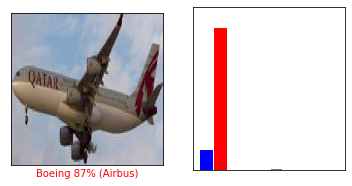

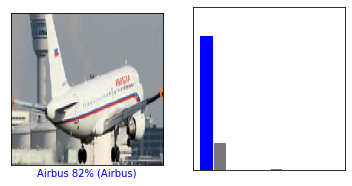

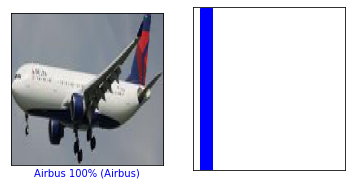

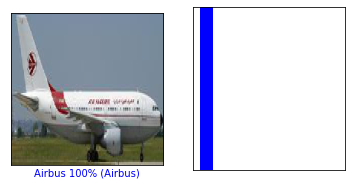

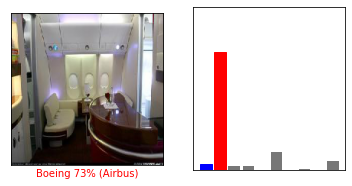

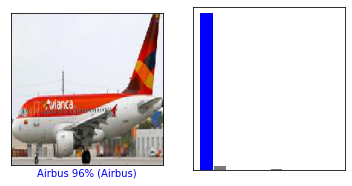

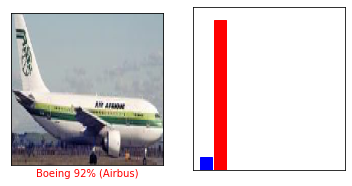

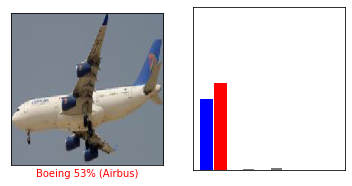

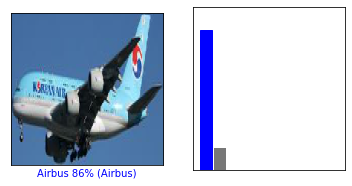

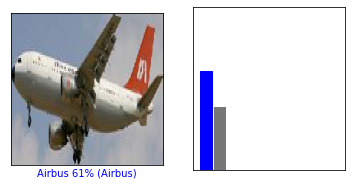

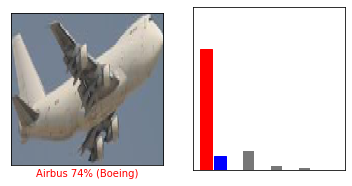

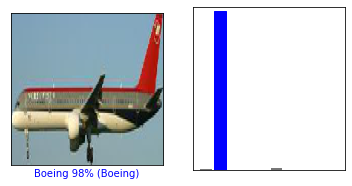

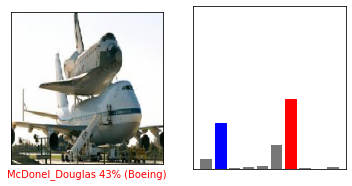

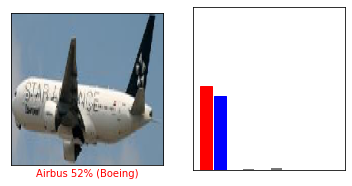

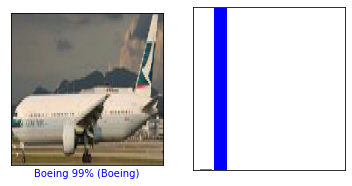

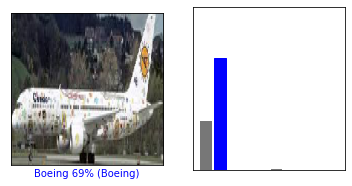

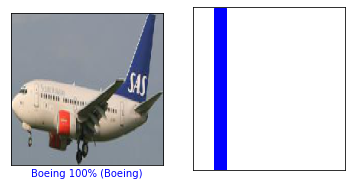

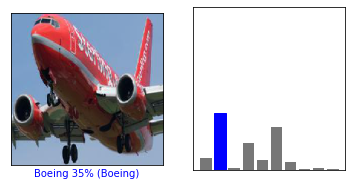

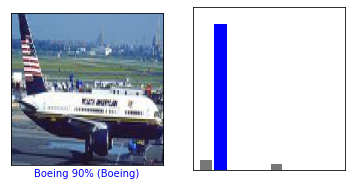

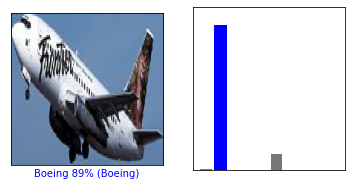

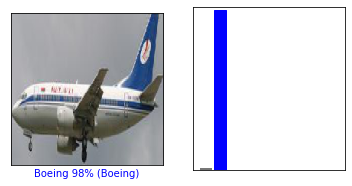

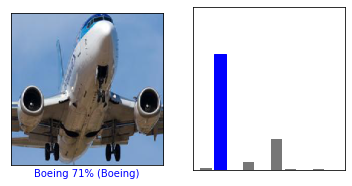

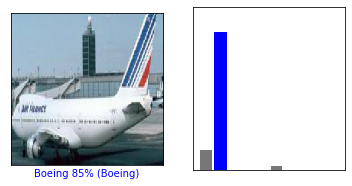

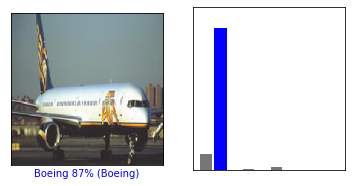

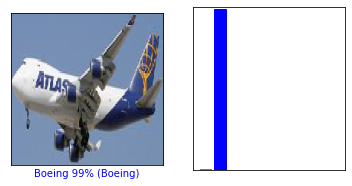

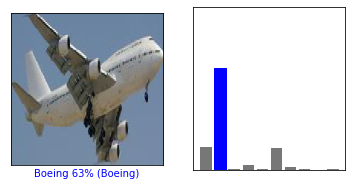

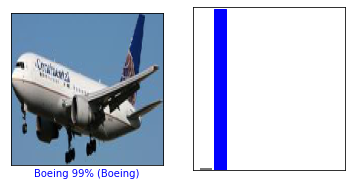

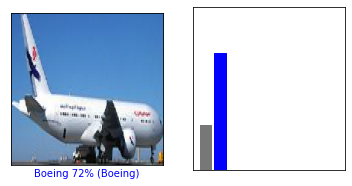

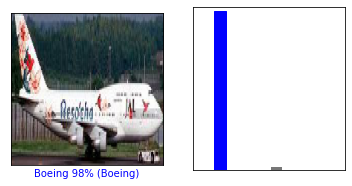

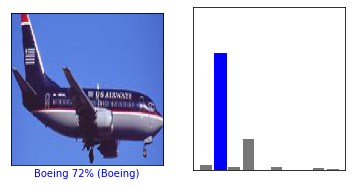

In [ ]:

for i in range(0,10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions,  test_labels)
  plt.show()

for i in range(500,510):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions,  test_labels)
  plt.show()

for i in range(1000,1010):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions,  test_labels)
  plt.show()

분류 결과를 보면 특이한 이미지들(실내 사진, 비행기 두대가 겹쳐있는 사진 등)은 분류가 틀렸지만 약간의 확률 차이로 틀린 것을 확인할 수 있고, 대체로 옳게 분류한 것을 확인할 수 있다.